DATA PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import LeaveOneOut, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
country_mapping = {
    "AFG": "Afghanistan",
    "ALB": "Albania",
    "DZA": "Algeria",
    "AGO": "Angola",
    "ARG": "Argentina",
    "ARM": "Armenia",
    "AUS": "Australia",
    "AUT": "Austria",
    "AZE": "Azerbaijan",
    "BHS": "Bahamas",
    "BGD": "Bangladesh",
    "BRB": "Barbados",
    "BLR": "Belarus",
    "BEL": "Belgium",
    "BLZ": "Belize",
    "BEN": "Benin",
    "BOL": "Bolivia",
    "BIH": "Bosnia and Herzegovina",
    "BWA": "Botswana",
    "BRA": "Brazil",
    "BGR": "Bulgaria",
    "BFA": "Burkina Faso",
    "BDI": "Burundi",
    "CPV": "Cabo Verde",
    "KHM": "Cambodia",
    "CMR": "Cameroon",
    "CAN": "Canada",
    "CAF": "Central African Republic",
    "TCD": "Chad",
    "CHL": "Chile",
    "CHN": "China",
    "COL": "Colombia",
    "COM": "Comoros",
    "COG": "Congo",
    "CRI": "Costa Rica",
    "HRV": "Croatia",
    "CUB": "Cuba",
    "CYP": "Cyprus",
    "CZE": "Czechia",
    "CIV": "Côte d'Ivoire",
    "DNK": "Denmark",
    "DJI": "Djibouti",
    "ECU": "Ecuador",
    "EGY": "Egypt",
    "SLV": "El Salvador",
    "EST": "Estonia",
    "SWZ": "Eswatini",
    "ETH": "Ethiopia",
    "FJI": "Fiji",
    "FIN": "Finland",
    "FRA": "France",
    "PYF": "French Polynesia",
    "GAB": "Gabon",
    "GMB": "Gambia",
    "GEO": "Georgia",
    "DEU": "Germany",
    "GHA": "Ghana",
    "GRC": "Greece",
    "GTM": "Guatemala",
    "GIN": "Guinea",
    "GNB": "Guinea-Bissau",
    "GUY": "Guyana",
    "HTI": "Haiti",
    "HND": "Honduras",
    "HUN": "Hungary",
    "ISL": "Iceland",
    "IND": "India",
    "IDN": "Indonesia",
    "IRN": "Iran (Islamic Republic of)",
    "IRQ": "Iraq",
    "IRL": "Ireland",
    "ISR": "Israel",
    "ITA": "Italy",
    "JAM": "Jamaica",
    "JPN": "Japan",
    "JOR": "Jordan",
    "KAZ": "Kazakhstan",
    "KEN": "Kenya",
    "KIR": "Kiribati",
    "KWT": "Kuwait",
    "KGZ": "Kyrgyzstan",
    "LAO": "Lao People's Democratic Republic",
    "LVA": "Latvia",
    "LBN": "Lebanon",
    "LSO": "Lesotho",
    "LBR": "Liberia",
    "LBY": "Libya",
    "LTU": "Lithuania",
    "LUX": "Luxembourg",
    "MDG": "Madagascar",
    "MWI": "Malawi",
    "MYS": "Malaysia",
    "MDV": "Maldives",
    "MLI": "Mali",
    "MLT": "Malta",
    "MRT": "Mauritania",
    "MUS": "Mauritius",
    "MEX": "Mexico",
    "MNG": "Mongolia",
    "MNE": "Montenegro",
    "MAR": "Morocco",
    "MOZ": "Mozambique",
    "MMR": "Myanmar",
    "NAM": "Namibia",
    "NPL": "Nepal",
    "NLD": "Netherlands",
    "NCL": "New Caledonia",
    "NZL": "New Zealand",
    "NIC": "Nicaragua",
    "NER": "Niger",
    "NGA": "Nigeria",
    "MKD": "North Macedonia",
    "NOR": "Norway",
    "OMN": "Oman",
    "PAK": "Pakistan",
    "PAN": "Panama",
    "PNG": "Papua New Guinea",
    "PRY": "Paraguay",
    "PER": "Peru",
    "PHL": "Philippines",
    "POL": "Poland",
    "PRT": "Portugal",
    "MDA": "Republic of Moldova",
    "ROU": "Romania",
    "RUS": "Russian Federation",
    "RWA": "Rwanda",
    "LCA": "Saint Lucia",
    "STP": "Sao Tome and Principe",
    "SAU": "Saudi Arabia",
    "SEN": "Senegal",
    "SRB": "Serbia",
    "SLE": "Sierra Leone",
    "SVK": "Slovakia",
    "SVN": "Slovenia",
    "SLB": "Solomon Islands",
    "SOM": "Somalia",
    "ZAF": "South Africa",
    "ESP": "Spain",
    "LKA": "Sri Lanka",
    "SUR": "Suriname",
    "SWE": "Sweden",
    "CHE": "Switzerland",
    "SYR": "Syrian Arab Republic",
    "TJK": "Tajikistan",
    "THA": "Thailand",
    "TLS": "Timor-Leste",
    "TGO": "Togo",
    "TTO": "Trinidad and Tobago",
    "TUN": "Tunisia",
    "TKM": "Turkmenistan",
    "TUR": "Türkiye",
    "UGA": "Uganda",
    "UKR": "Ukraine",
    "ARE": "United Arab Emirates",
    "GBR": "United Kingdom",
    "TZA": "Tanzania",
    "USA": "United States of America",
    "URY": "Uruguay",
    "UZB": "Uzbekistan",
    "VUT": "Vanuatu",
    "VEN": "Venezuela (Bolivarian Republic of)",
    "VNM": "Viet Nam",
    "YEM": "Yemen",
    "ZMB": "Zambia",
    "ZWE": "Zimbabwe"
}


In [3]:
df = pd.read_csv('colorectal_cancer.csv')
df['Country'] = df['Country'].map(country_mapping)
df = df.dropna(subset=['Country'])
df = df.set_index('Country')
df.index.name = 'Country'

In [4]:
df_world = pd.read_csv('world bank 2.csv')
df_world_pivot = df_world.pivot_table(
    index='Country Name',
    columns='Series Name',
    values='2016 [YR2016]',
    aggfunc='first'
)
df_world_pivot.index.name = 'Country'

In [5]:
df_hrana = pd.read_csv('diabetes hrana.csv')
df_hrana_pivot = df_hrana.pivot_table(
    index='Area',
    columns='Item',
    values='Value',
    aggfunc='first'
)
df_hrana_pivot.index.name = 'Country'
df_hrana_pivot.columns = df_hrana_pivot.columns.astype(str)

In [6]:
df_makro = pd.read_csv('Makronutrienti.csv')
df_makro_pivot = df_makro.pivot_table(
    index='Area',
    columns='Indicator',
    values='Value',
    aggfunc='first'
)
df_makro_pivot.index.name = 'Country'
df_makro_pivot.columns = df_makro_pivot.columns.astype(str)

In [7]:
df_sug = pd.read_csv('hrana sekeri .csv')
df_sug_pivot = df_sug.pivot_table(
    index='Area',
    columns='Item',
    values='Value',
    aggfunc='first'
)
df_sug_pivot.index.name = 'Country'
df_sug_pivot.columns = df_sug_pivot.columns.astype(str)

In [8]:
df_combined = (
    df
    .join(df_world_pivot, how='inner')
    .join(df_hrana_pivot, how='inner')
    .join(df_makro_pivot, how='inner')
    .join(df_sug_pivot, how='inner')
)

In [9]:
print("Rows in df_combined:", len(df_combined))
print("Index name:", df_combined.index.name)

Rows in df_combined: 145
Index name: Country


In [10]:
import pandas as pd
df_tobacco = pd.read_csv(
    'tobacco_prevalence_2022.csv'
)

In [11]:
df_combined = df_combined.reset_index().rename(columns={'index':'Country'})
df_combined['Country'] = (
    df_combined['Country']
      .astype(str)
      .str.strip()
      .str.lower()
)
df_tobacco['Country'] = (
    df_tobacco['Country']
      .astype(str)
      .str.strip()
      .str.lower()
)

In [12]:
common = set(df_combined['Country']).intersection(df_tobacco['Country'])
print(f"{len(common)}/{len(df_combined)} countries in common")

145/145 countries in common


In [13]:
df_final = df_combined.merge(
    df_tobacco[['Country',
                'Prevalence of current tobacco use (% of adults)']],
    on='Country',
    how='left'
)
print("After merge:", df_final.shape)

After merge: (145, 32)


In [14]:
med = df_final['Prevalence of current tobacco use (% of adults)'].median()
df_final['Prevalence of current tobacco use (% of adults)'] \
    .fillna(med, inplace=True)
df_final = df_final.set_index('Country', drop=True)

C:\Users\Pavle\AppData\Local\Temp\ipykernel_11048\2433045903.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  .fillna(med, inplace=True)


In [15]:
df_final

,Number,Diabetes prevalence (% of population ages 20 to 79),"Population, total",Prevalence of overweight (% of adults),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Number of obese adults (18 years and older) (million),...,Coconut Oil,"Fruits, other",Honey,Olive Oil,"Oranges, Mandarines",Palm Oil,Sugar (Raw Equivalent),"Sweeteners, Other","Vegetables, other",Prevalence of current tobacco use (% of adults)
Country,,,,,,,,,,,,,,,,,,,,,
afghanistan,1163,..,34700612,38.89,0.013,105,37.2,64.2,12.3,1.3,...,NaN,9.51,0.56,0.46,3.67,80.83,124.26,3.13,20.06,22.70
albania,522,..,2876101,59.7,5.13,132,106.2,111,58.3,0.4,...,NaN,58.33,9.80,65.30,13.76,NaN,214.61,19.32,114.00,21.90
algeria,7747,..,40850721,53.46,0.6,142,93.4,92.7,28.1,4.5,...,1.06,36.57,1.42,42.23,24.43,8.96,272.75,7.37,81.86,21.20
angola,805,..,29183070,28.77,7.01,115,54.9,50.6,18.4,1,...,0.00,12.88,8.08,3.60,0.13,155.96,105.64,11.23,18.40,19.55
azerbaijan,1741,..,9757812,58.85,1.46,123,65.2,91.2,29.9,1.4,...,0.15,49.04,2.28,3.18,2.86,NaN,166.54,30.62,67.00,19.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
north macedonia,900,..,1906313,59.4,4.36,117,NaN,NaN,NaN,0.4,...,NaN,35.87,4.83,19.75,9.59,NaN,352.00,19.06,90.48,19.55
burkina faso,460,..,19334856,17.26,9.72,119,59.8,76.4,12.6,0.3,...,4.60,5.98,0.01,0.12,0.18,64.97,71.69,1.51,10.96,14.30
uruguay,2092,..,3379283,62.45,5.86,129,104.6,94.4,54.2,0.6,...,NaN,21.45,20.63,11.50,26.21,NaN,400.13,46.08,29.54,20.50


In [16]:
df_final.drop(
    columns=['Diabetes prevalence (% of population ages 20 to 79)'],
    inplace=True
)

In [17]:
df_final.isnull().sum()

Number                                                                                                    0
Population, total                                                                                         0
Prevalence of overweight (% of adults)                                                                    0
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)      0
Average dietary energy supply adequacy (percent) (3-year average)                                         3
Average fat supply (g/cap/day) (3-year average)                                                          23
Average protein supply (g/cap/day) (3-year average)                                                      23
Average supply of protein of animal origin (g/cap/day) (3-year average)                                  23
Number of obese adults (18 years and older) (million)                                                     1
Per capita food supply varia

In [18]:
for col in df_final.columns:
    if col != 'Number':
        df_final[col] = pd.to_numeric(df_final[col], errors='coerce')


In [19]:
threshold = 0.3
miss_frac = df_final.isnull().mean()
cols_to_drop = miss_frac[miss_frac > threshold].index.tolist()
df_final.drop(columns=cols_to_drop, inplace=True)

num_cols = df_final.select_dtypes(include=[np.number]).columns
medians = df_final[num_cols].median()
df_final[num_cols] = df_final[num_cols].fillna(medians)

In [20]:
df_final.isnull().sum()

Number                                                                                                  0
Population, total                                                                                       0
Prevalence of overweight (% of adults)                                                                  0
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)    0
Average dietary energy supply adequacy (percent) (3-year average)                                       0
Average fat supply (g/cap/day) (3-year average)                                                         0
Average protein supply (g/cap/day) (3-year average)                                                     0
Average supply of protein of animal origin (g/cap/day) (3-year average)                                 0
Number of obese adults (18 years and older) (million)                                                   0
Per capita food supply variability (kcal/cap/d

In [21]:
rows, cols = df_final.shape
print(f"Rows: {rows}")
print(f"Columns: {cols}")

Rows: 145
Columns: 26


In [22]:
df_final

,Number,"Population, total",Prevalence of overweight (% of adults),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Number of obese adults (18 years and older) (million),Per capita food supply variability (kcal/cap/day),...,Vitamin C supply,Zinc supply,"Fruits, other",Honey,Olive Oil,"Oranges, Mandarines",Sugar (Raw Equivalent),"Sweeteners, Other","Vegetables, other",Prevalence of current tobacco use (% of adults)
Country,,,,,,,,,,,,,,,,,,,,,
afghanistan,1163,34700612,38.89,0.013,105.0,37.20,64.20,12.3,1.3,62.0,...,0.0,0.42,9.51,0.56,0.46,3.67,124.26,3.13,20.06,22.70
albania,522,2876101,59.70,5.130,132.0,106.20,111.00,58.3,0.4,64.0,...,1.0,0.61,58.33,9.80,65.30,13.76,214.61,19.32,114.00,21.90
algeria,7747,40850721,53.46,0.600,142.0,93.40,92.70,28.1,4.5,23.0,...,1.0,0.77,36.57,1.42,42.23,24.43,272.75,7.37,81.86,21.20
angola,805,29183070,28.77,7.010,115.0,54.90,50.60,18.4,1.0,166.0,...,0.0,0.74,12.88,8.08,3.60,0.13,105.64,11.23,18.40,19.55
azerbaijan,1741,9757812,58.85,1.460,123.0,65.20,91.20,29.9,1.4,95.0,...,0.0,0.19,49.04,2.28,3.18,2.86,166.54,30.62,67.00,19.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
north macedonia,900,1906313,59.40,4.360,117.0,75.45,77.25,30.9,0.4,71.0,...,0.0,0.84,35.87,4.83,19.75,9.59,352.00,19.06,90.48,19.55
burkina faso,460,19334856,17.26,9.720,119.0,59.80,76.40,12.6,0.3,5.0,...,1.0,2.42,5.98,0.01,0.12,0.18,71.69,1.51,10.96,14.30
uruguay,2092,3379283,62.45,5.860,129.0,104.60,94.40,54.2,0.6,59.0,...,0.0,0.41,21.45,20.63,11.50,26.21,400.13,46.08,29.54,20.50


In [23]:
print(df_final.columns.tolist())

['Number', 'Population, total', 'Prevalence of overweight (% of adults)', 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)', 'Average dietary energy supply adequacy (percent) (3-year average)', 'Average fat supply (g/cap/day) (3-year average)', 'Average protein supply (g/cap/day) (3-year average)', 'Average supply of protein of animal origin (g/cap/day) (3-year average)', 'Number of obese adults (18 years and older) (million)', 'Per capita food supply variability (kcal/cap/day)', 'Prevalence of anemia among women of reproductive age (15-49 years) (percent)', 'Carbohydrate (available) supply', 'Energy supply', 'Fat supply', 'Magnesium supply', 'Protein supply', 'Vitamin C supply', 'Zinc supply', 'Fruits, other', 'Honey', 'Olive Oil', 'Oranges, Mandarines', 'Sugar (Raw Equivalent)', 'Sweeteners, Other', 'Vegetables, other', 'Prevalence of current tobacco use (% of adults)']


In [24]:
df_final

,Number,"Population, total",Prevalence of overweight (% of adults),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Number of obese adults (18 years and older) (million),Per capita food supply variability (kcal/cap/day),...,Vitamin C supply,Zinc supply,"Fruits, other",Honey,Olive Oil,"Oranges, Mandarines",Sugar (Raw Equivalent),"Sweeteners, Other","Vegetables, other",Prevalence of current tobacco use (% of adults)
Country,,,,,,,,,,,,,,,,,,,,,
afghanistan,1163,34700612,38.89,0.013,105.0,37.20,64.20,12.3,1.3,62.0,...,0.0,0.42,9.51,0.56,0.46,3.67,124.26,3.13,20.06,22.70
albania,522,2876101,59.70,5.130,132.0,106.20,111.00,58.3,0.4,64.0,...,1.0,0.61,58.33,9.80,65.30,13.76,214.61,19.32,114.00,21.90
algeria,7747,40850721,53.46,0.600,142.0,93.40,92.70,28.1,4.5,23.0,...,1.0,0.77,36.57,1.42,42.23,24.43,272.75,7.37,81.86,21.20
angola,805,29183070,28.77,7.010,115.0,54.90,50.60,18.4,1.0,166.0,...,0.0,0.74,12.88,8.08,3.60,0.13,105.64,11.23,18.40,19.55
azerbaijan,1741,9757812,58.85,1.460,123.0,65.20,91.20,29.9,1.4,95.0,...,0.0,0.19,49.04,2.28,3.18,2.86,166.54,30.62,67.00,19.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
north macedonia,900,1906313,59.40,4.360,117.0,75.45,77.25,30.9,0.4,71.0,...,0.0,0.84,35.87,4.83,19.75,9.59,352.00,19.06,90.48,19.55
burkina faso,460,19334856,17.26,9.720,119.0,59.80,76.40,12.6,0.3,5.0,...,1.0,2.42,5.98,0.01,0.12,0.18,71.69,1.51,10.96,14.30
uruguay,2092,3379283,62.45,5.860,129.0,104.60,94.40,54.2,0.6,59.0,...,0.0,0.41,21.45,20.63,11.50,26.21,400.13,46.08,29.54,20.50


In [25]:
print(df_combined['Number'].head())
print(df_combined['Number'].describe())

0    1163
1     522
2    7747
3     805
4    1741
Name: Number, dtype: int64
count       145.000000
mean      10943.531034
std       45989.855041
min           8.000000
25%         365.000000
50%        1127.000000
75%        5723.000000
max      517106.000000
Name: Number, dtype: float64


In [26]:
df_activity = pd.read_csv('activity.csv')
df_activity_wide = df_activity.pivot(
    index='Country',
    columns='Indicator',
    values='Value'
).reset_index()

df_activity_wide = df_activity_wide.rename(
    columns={
        'Prevalence of insufficient physical activity among adults aged 18+ years (age-standardized estimate) (%)':
        'insufficient_physical_activity_pct'
    }
)

print(df_activity_wide.head())

Indicator      Country  insufficient_physical_activity_pct
0          Afghanistan                                33.4
1              Albania                                24.3
2              Algeria                                29.0
3              Andorra                                27.2
4               Angola                                17.3


In [27]:
df_activity_wide = df_activity_wide.set_index('Country')
df_activity_wide.columns.name = None

df_activity_wide.index.name = None
print(df_activity_wide.head())

             insufficient_physical_activity_pct
Afghanistan                                33.4
Albania                                    24.3
Algeria                                    29.0
Andorra                                    27.2
Angola                                     17.3


In [28]:
print("df_final.columns:", df_final.columns.tolist())
print("df_final.index.name:", df_final.index.name)
print("df_activity_wide.columns:", df_activity_wide.columns.tolist())
print("df_activity_wide.index.name:", df_activity_wide.index.name)

df_final.columns: ['Number', 'Population, total', 'Prevalence of overweight (% of adults)', 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)', 'Average dietary energy supply adequacy (percent) (3-year average)', 'Average fat supply (g/cap/day) (3-year average)', 'Average protein supply (g/cap/day) (3-year average)', 'Average supply of protein of animal origin (g/cap/day) (3-year average)', 'Number of obese adults (18 years and older) (million)', 'Per capita food supply variability (kcal/cap/day)', 'Prevalence of anemia among women of reproductive age (15-49 years) (percent)', 'Carbohydrate (available) supply', 'Energy supply', 'Fat supply', 'Magnesium supply', 'Protein supply', 'Vitamin C supply', 'Zinc supply', 'Fruits, other', 'Honey', 'Olive Oil', 'Oranges, Mandarines', 'Sugar (Raw Equivalent)', 'Sweeteners, Other', 'Vegetables, other', 'Prevalence of current tobacco use (% of adults)']
df_final.index.name: Country
df_activity_wid

In [29]:
if df_final.index.name and df_final.index.name.lower() == 'country':
    df_final = df_final.reset_index()

if df_activity_wide.index.name and df_activity_wide.index.name.lower() == 'country':
    df_activity_wide = df_activity_wide.reset_index()
elif df_activity_wide.index.inferred_type in ['string', 'mixed']:

    df_activity_wide = df_activity_wide.reset_index().rename(columns={'index': 'Country'})


for df, df_name in [(df_final, 'df_final'), (df_activity_wide, 'df_activity_wide')]:

    if 'Country' not in df.columns:
        possible_country_cols = [col for col in df.columns if col.lower().strip() in ['country', 'countries', 'nation', 'country_name']]
        if possible_country_cols:
            df.rename(columns={possible_country_cols[0]: 'Country'}, inplace=True)
        else:
            print(f"{df_name} columns:", df.columns.tolist())
            print(f"{df_name} head:\n", df.head())
            raise KeyError(f"'Country' column not found in {df_name}. Available columns: {df.columns.tolist()}")


    df.columns = df.columns.str.strip()
    df['Country'] = df['Country'].str.strip().str.lower()


df_merged = df_final.merge(
    df_activity_wide,
    on='Country',
    how='left'
)


df_merged = df_merged.set_index('Country')


missing = df_merged['insufficient_physical_activity_pct'].isna().sum()
print(f'Missing activity for {missing} countries out of {len(df_merged)}')

print(df_merged.head())

Missing activity for 2 countries out of 145
             Number  Population, total  \
Country                                  
afghanistan    1163           34700612   
albania         522            2876101   
algeria        7747           40850721   
angola          805           29183070   
azerbaijan     1741            9757812   

             Prevalence of overweight (% of adults)  \
Country                                               
afghanistan                                   38.89   
albania                                       59.70   
algeria                                       53.46   
angola                                        28.77   
azerbaijan                                    58.85   

             Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
Country                                                                                                             
afghanistan                              

In [30]:
df_merged[df_merged['insufficient_physical_activity_pct'].isna()]

,Number,"Population, total",Prevalence of overweight (% of adults),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Number of obese adults (18 years and older) (million),Per capita food supply variability (kcal/cap/day),...,Zinc supply,"Fruits, other",Honey,Olive Oil,"Oranges, Mandarines",Sugar (Raw Equivalent),"Sweeteners, Other","Vegetables, other",Prevalence of current tobacco use (% of adults),insufficient_physical_activity_pct
Country,,,,,,,,,,,,,,,,,,,,,
french polynesia,48,279178,72.490,5.13,117.0,116.9,105.3,68.4,0.1,20.0,...,0.57,51.83,3.61,21.94,5.78,203.12,23.66,33.10,19.55,NaN
new caledonia,91,283423,52.575,5.13,118.0,115.5,94.0,58.5,0.8,30.0,...,0.45,32.12,3.57,30.51,8.40,213.91,26.12,50.12,19.55,NaN


In [31]:
median_val = df_merged['insufficient_physical_activity_pct'].median()
df_filled   = df_merged.copy()
df_filled.loc[:, 'insufficient_physical_activity_pct'] = df_filled['insufficient_physical_activity_pct'].fillna(median_val)

In [32]:
df_filled.isnull().sum()

Number                                                                                                  0
Population, total                                                                                       0
Prevalence of overweight (% of adults)                                                                  0
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)    0
Average dietary energy supply adequacy (percent) (3-year average)                                       0
Average fat supply (g/cap/day) (3-year average)                                                         0
Average protein supply (g/cap/day) (3-year average)                                                     0
Average supply of protein of animal origin (g/cap/day) (3-year average)                                 0
Number of obese adults (18 years and older) (million)                                                   0
Per capita food supply variability (kcal/cap/d

In [33]:
df_filled['overweight_count'] = (
    df_filled['Population, total'] *
    df_filled['Prevalence of overweight (% of adults)'] / 100
).round().astype(int)

In [34]:
df_filled.to_csv('df_filled.csv', index=False)

In [35]:
df_filled = df_filled.drop(columns=['overweight_count'])

In [36]:
df_filled['Rate_per_100k'] = (df_filled['Number'] / df_filled['Population, total']) * 100000

In [37]:
df_filled['Obese_adults_count'] = (
    df_filled['Number of obese adults (18 years and older) (million)'] * 1e6
)

df_filled['Obese_per_100k'] = (
    df_filled['Obese_adults_count'] 
    / df_filled['Population, total']
) * 100000

df_filled.drop(
    columns=[
        'Number of obese adults (18 years and older) (million)',
        'Obese_adults_count'
    ],
    inplace=True
)


In [38]:
df_filled = df_filled.drop(columns=['Number','Population, total'])

In [39]:
df_filled = df_filled.drop(columns=['Prevalence of anemia among women of reproductive age (15-49 years) (percent)'])

In [40]:
df_filled.isnull().sum()

Prevalence of overweight (% of adults)                                                                  0
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)    0
Average dietary energy supply adequacy (percent) (3-year average)                                       0
Average fat supply (g/cap/day) (3-year average)                                                         0
Average protein supply (g/cap/day) (3-year average)                                                     0
Average supply of protein of animal origin (g/cap/day) (3-year average)                                 0
Per capita food supply variability (kcal/cap/day)                                                       0
Carbohydrate (available) supply                                                                         0
Energy supply                                                                                           0
Fat supply                                    

Model Training Using Bagging and Boosting Techniques

XGBoost 

In [41]:
import xgboost as xgb

target_col = 'Rate_per_100k'

X = df_filled.drop(columns=[target_col])
y_orig = df_filled[target_col]
y_log = np.log1p(y_orig)
countries = X.index.to_numpy()

X_num = X.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_num),
    index=X.index,
    columns=X_num.columns
)

iso = IsolationForest(contamination=0.05, random_state=42)
mask = iso.fit_predict(X_scaled) == 1
X_clean = X_scaled[mask].copy()
y_log_clean = y_log[mask]
y_orig_clean = y_orig[mask]
ct_clean = countries[mask]

print(f"Outliers removed: {len(X_scaled) - len(X_clean)}; remaining: {len(X_clean)}")


outlier_indices = np.where(mask == 0)[0]
if len(outlier_indices) > 0:
    print("\nRemoved outliers (countries):")
    for idx in outlier_indices:
        country = countries[idx]
        print(f"- Country: {country}")

param_dist = {
    'n_estimators': [300, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.1],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}

xgb_base = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

loo = LeaveOneOut()
rnd_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=30,
    cv=loo,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rnd_search.fit(X_clean, y_log_clean)
best_params = rnd_search.best_params_
print("Best XGB parameters:", best_params)

def run_xgb_loocv(params, X, y_log, y_orig, countries):
    loo = LeaveOneOut()
    records = []
    ytl, ypl, yto, ypo = [], [], [], []

    for train, test in loo.split(X):
        Xtr, Xte = X.iloc[train], X.iloc[test]
        ytr = y_log.iloc[train]

        model = xgb.XGBRegressor(**params, objective='reg:squarederror', random_state=42)
        model.fit(Xtr, ytr)
        pred_l = model.predict(Xte)[0]

        idx = test[0]
        act = y_orig.iloc[idx]
        pred = np.expm1(pred_l)

        ytl.append(y_log.iloc[idx]); ypl.append(pred_l)
        yto.append(act); ypo.append(pred)

        records.append({
            'Country': countries[idx],
            'Actual': int(round(act)),
            'Predicted': int(round(pred)),
            'Error': abs(act - pred)
        })

    df_res = pd.DataFrame(records)
    rmse_l = np.sqrt(mean_squared_error(ytl, ypl))
    r2_l = r2_score(ytl, ypl)
    rmse_o = np.sqrt(mean_squared_error(yto, ypo))
    r2_o = r2_score(yto, ypo)

    print(f"\nRMSE (log-target) = {rmse_l:.4f}")
    print(f"R² (log-target)   = {r2_l:.4f}")
    print(f"RMSE (original)   = {rmse_o:.4f}")
    print(f"R² (original)     = {r2_o:.4f}\n")

    return df_res

xgb_results_tuned = run_xgb_loocv(
    best_params,
    X_clean,
    y_log_clean,
    y_orig_clean,
    ct_clean
)

pd.set_option('display.max_rows', None)
print("All countries (tuned XGB):")
print(xgb_results_tuned[['Country', 'Actual', 'Predicted']])
print("\nTop 10 countries by absolute error (tuned XGB):")
print(xgb_results_tuned.nlargest(10, 'Error')[['Country', 'Actual', 'Predicted', 'Error']])

Outliers removed: 8; remaining: 137

Removed outliers (countries):
- Country: central african republic
- Country: china
- Country: israel
- Country: vanuatu
- Country: niger
- Country: rwanda
- Country: united arab emirates
- Country: uganda
Fitting 137 folds for each of 30 candidates, totalling 4110 fits
Best XGB parameters: {'subsample': 0.7, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}

RMSE (log-target) = 0.4631
R² (log-target)   = 0.8309
RMSE (original)   = 15.1972
R² (original)     = 0.7537

All countries (tuned XGB):
                    Country  Actual  Predicted
0               afghanistan       3          4
1                   albania      18         44
2                   algeria      19         14
3                    angola       3          6
4                azerbaijan      18         11
5                 argentina      36         17
6                 australia      71         79
7                   

SHAP Visualization for XGBoost

C:\Users\Pavle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Pavle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


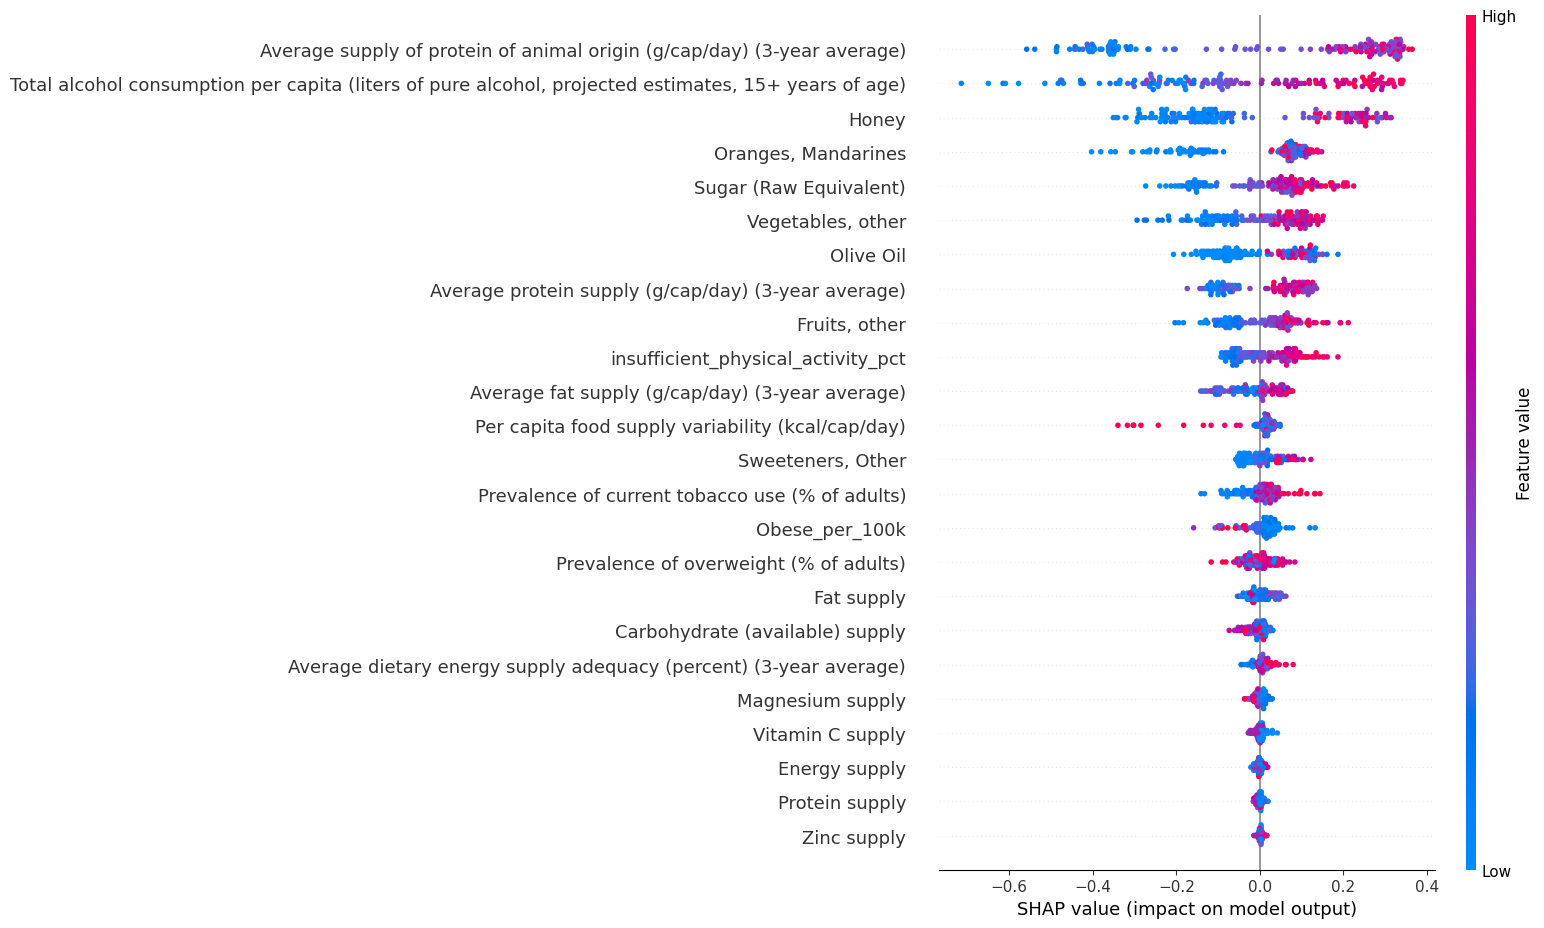

In [42]:
import shap

target_col = 'Rate_per_100k'
X = df_filled.drop(columns=[target_col])
y = np.log1p(df_filled[target_col])


X_num = X.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_num),
    index=X_num.index,
    columns=X_num.columns
)

best_params = {
    'subsample': 0.7,
    'n_estimators': 300,
    'min_child_weight': 3,
    'max_depth': 5,
    'learning_rate': 0.1,
    'gamma': 0,
    'colsample_bytree': 1.0,
    'objective': 'reg:squarederror',
    'random_state': 42
}
model_xgb = xgb.XGBRegressor(**best_params)
model_xgb.fit(X_scaled, y)


explainer = shap.TreeExplainer(model_xgb, feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X_scaled)


shap.summary_plot(shap_values, X_scaled, max_display=25)


Accuracy (R²) on test data: 0.84


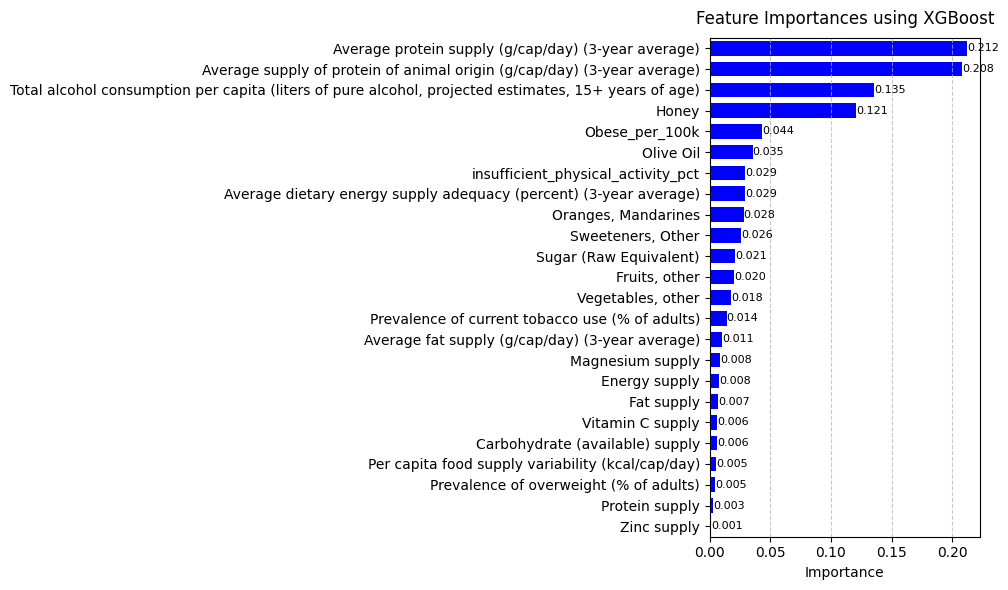

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_log_clean, test_size=0.2, random_state=42)

model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train)
print("Accuracy (R²) on test data: {:.2f}".format(model.score(X_test, y_test)))

tree_importance = model.feature_importances_
tree_sorted_idx = np.argsort(tree_importance)
tree_indices = np.arange(0, len(tree_importance)) + 0.5

plt.figure(figsize=(10, 6))
bars = plt.barh(tree_indices, tree_importance[tree_sorted_idx], height=0.7, color='blue')
plt.yticks(tree_indices, X_clean.columns[tree_sorted_idx], fontsize=10)
plt.ylim((0, len(tree_importance)))
plt.title("Feature Importances using XGBoost", fontsize=12, pad=10)
plt.xlabel("Importance", fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.3f}', 
             ha='left', va='center', fontsize=8)
plt.tight_layout()
plt.show()

RandomForestRegressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

target_col = 'Rate_per_100k'

X = df_filled.drop(columns=[target_col])
y_orig = df_filled[target_col]
y_log = np.log1p(y_orig)
countries = X.index.to_numpy()

X_num = X.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_num),
    index=X_num.index,
    columns=X_num.columns
)

iso = IsolationForest(contamination=0.05, random_state=42)
mask = iso.fit_predict(X_scaled) == 1
X_clean = X_scaled[mask].copy()
y_log_clean = y_log[mask]
y_orig_clean = y_orig[mask]
ct_clean = countries[mask]

print(f"Outliers removed: {len(X_scaled) - len(X_clean)}; remaining: {len(X_clean)}")


outlier_indices = np.where(mask == 0)[0]
if len(outlier_indices) > 0:
    print("\nRemoved outliers (countries):")
    for idx in outlier_indices:
        country = countries[idx]
        print(f"- Country: {country}")

param_dist_rf = {
    'n_estimators': [300, 500, 800],
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', 0.5]
}

rf_base = RandomForestRegressor(random_state=42)

loo = LeaveOneOut()
rnd_search_rf = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist_rf,
    n_iter=20,
    cv=loo,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)
rnd_search_rf.fit(X_clean, y_log_clean)
best_rf_params = rnd_search_rf.best_params_
print("Best RF parameters:", best_rf_params)

def run_rf_loocv(params, X, y_log, y_orig, countries):
    loo = LeaveOneOut()
    records, ytl, ypl, yto, ypo = [], [], [], [], []
    for train_idx, test_idx in loo.split(X):
        Xtr, Xte = X.iloc[train_idx], X.iloc[test_idx]
        ytr = y_log.iloc[train_idx]
        model = RandomForestRegressor(**params, random_state=42)
        model.fit(Xtr, ytr)
        pred_l = model.predict(Xte)[0]
        idx = test_idx[0]
        act = y_orig.iloc[idx]
        pred = np.expm1(pred_l)
        ytl.append(y_log.iloc[idx]); ypl.append(pred_l)
        yto.append(act); ypo.append(pred)
        records.append({
            'Country': countries[idx],
            'Actual': int(round(act)),
            'Predicted': int(round(pred)),
            'Error': abs(act - pred)
        })
    df_res = pd.DataFrame(records)
    rmse_l = np.sqrt(mean_squared_error(ytl, ypl))
    r2_l = r2_score(ytl, ypl)
    rmse_o = np.sqrt(mean_squared_error(yto, ypo))
    r2_o = r2_score(yto, ypo)
    print(f"\nRF LOOCV Performance:")
    print(f"RMSE (log-target) = {rmse_l:.4f}")
    print(f"R² (log-target)   = {r2_l:.4f}")
    print(f"RMSE (original)   = {rmse_o:.4f}")
    print(f"R² (original)     = {r2_o:.4f}\n")
    return df_res

rf_results = run_rf_loocv(
    best_rf_params,
    X_clean,
    y_log_clean,
    y_orig_clean,
    ct_clean
)

pd.set_option('display.max_rows', None)
print("All countries (RF tuned):")
print(rf_results[['Country', 'Actual', 'Predicted']])
print("\nTop 10 countries by absolute error (RF tuned):")
print(rf_results.nlargest(10, 'Error')[['Country', 'Actual', 'Predicted', 'Error']])

Outliers removed: 8; remaining: 137

Removed outliers (countries):
- Country: central african republic
- Country: china
- Country: israel
- Country: vanuatu
- Country: niger
- Country: rwanda
- Country: united arab emirates
- Country: uganda
Fitting 137 folds for each of 20 candidates, totalling 2740 fits
Best RF parameters: {'n_estimators': 300, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 15}

RF LOOCV Performance:
RMSE (log-target) = 0.4766
R² (log-target)   = 0.8209
RMSE (original)   = 16.6246
R² (original)     = 0.7052

All countries (RF tuned):
                    Country  Actual  Predicted
0               afghanistan       3          4
1                   albania      18         46
2                   algeria      19         14
3                    angola       3          5
4                azerbaijan      18         13
5                 argentina      36         21
6                 australia      71         75
7                   austria      52         79
8       

SHAP Visualization for RandomForestRegressor

C:\Users\Pavle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\shap\plots\_beeswarm.py:1150: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


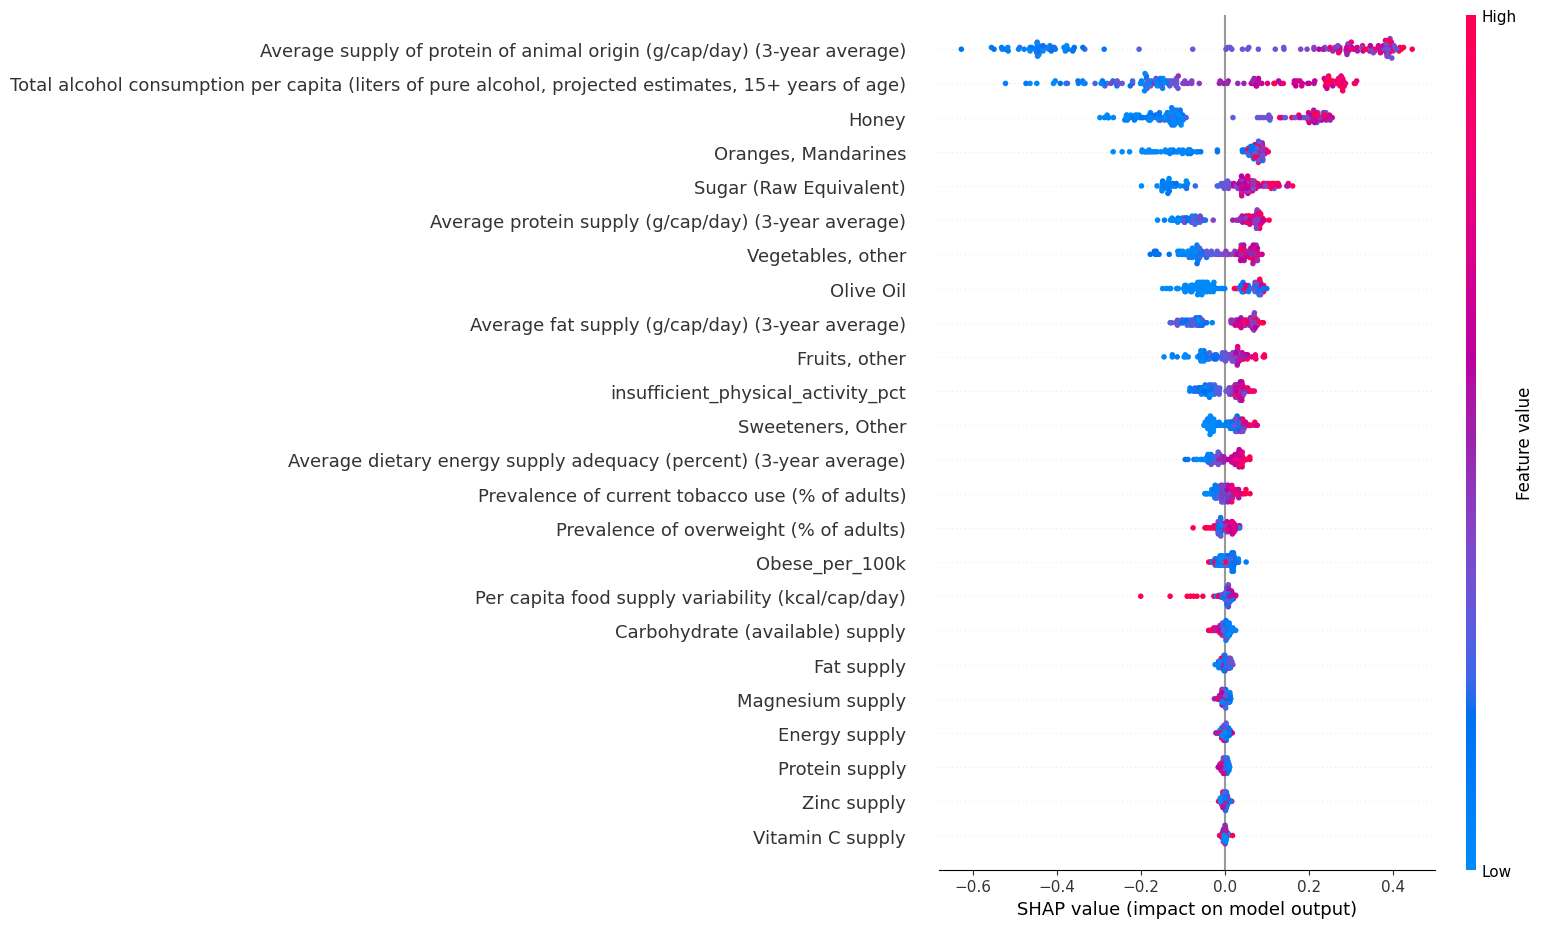

In [45]:
import shap

target_col = 'Rate_per_100k'
X = df_filled.drop(columns=[target_col])
y = np.log1p(df_filled[target_col])


X_num = X.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_num),
    index=X_num.index,
    columns=X_num.columns
)


best_rf_params = {
    'n_estimators': 300,
    'max_depth': 15,
    'min_samples_leaf': 1,
    'max_features': 0.5,
    'random_state': 42
}
model_rf = RandomForestRegressor(**best_rf_params)
model_rf.fit(X_scaled, y)


explainer_rf = shap.TreeExplainer(model_rf)
shap_values_rf = explainer_rf.shap_values(X_scaled)


shap.summary_plot(shap_values_rf, X_scaled, max_display=25)


Accuracy (R²) on test data: 0.80


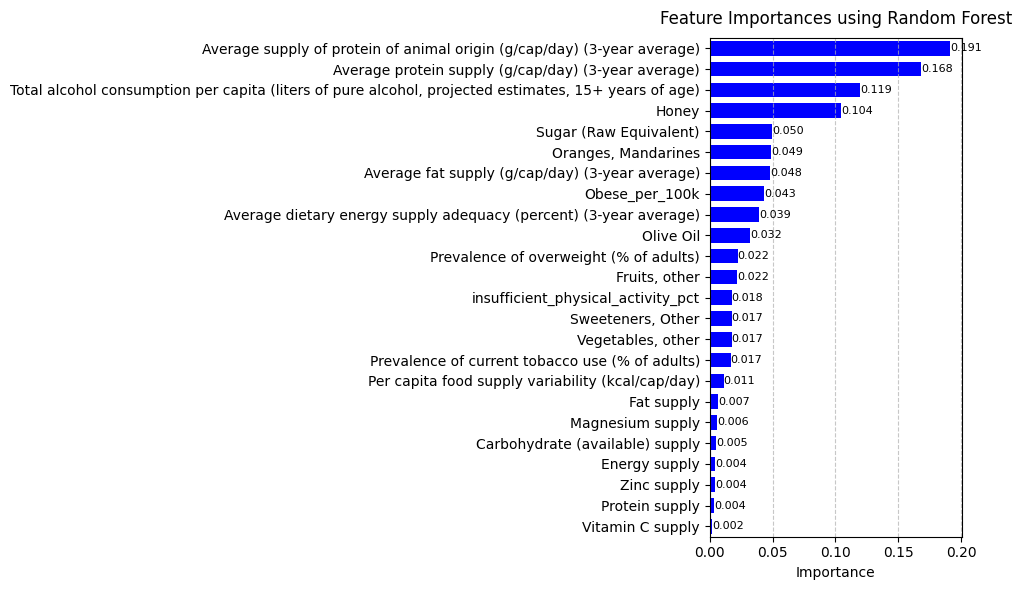

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_log_clean, test_size=0.2, random_state=42)

model = RandomForestRegressor(**best_rf_params)
model.fit(X_train, y_train)
print("Accuracy (R²) on test data: {:.2f}".format(model.score(X_test, y_test)))

tree_importance = model.feature_importances_
tree_sorted_idx = np.argsort(tree_importance)
tree_indices = np.arange(0, len(tree_importance)) + 0.5

plt.figure(figsize=(10, 6))
bars = plt.barh(tree_indices, tree_importance[tree_sorted_idx], height=0.7, color='blue')
plt.yticks(tree_indices, X_clean.columns[tree_sorted_idx], fontsize=10)
plt.ylim((0, len(tree_importance)))
plt.title("Feature Importances using Random Forest", fontsize=12, pad=10)
plt.xlabel("Importance", fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.3f}', 
             ha='left', va='center', fontsize=8)
plt.tight_layout()
plt.show()

KNeighborsRegressor

In [47]:
from sklearn.neighbors import KNeighborsRegressor

target_col = 'Rate_per_100k'
X = df_filled.drop(columns=[target_col])
y_orig = df_filled[target_col]
y_log = np.log1p(y_orig)
countries = X.index.to_numpy()

X_num = X.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_num),
    index=X.index,
    columns=X_num.columns
)

iso = IsolationForest(contamination=0.05, random_state=42)
mask = iso.fit_predict(X_scaled) == 1
X_clean = X_scaled[mask].copy()
y_log_clean = y_log[mask]
y_orig_clean = y_orig[mask]
ct_clean = countries[mask]

print(f"Outliers removed: {len(X_scaled) - len(X_clean)}; remaining: {len(X_clean)}")

outlier_indices = np.where(mask == 0)[0]
if len(outlier_indices) > 0:
    print("\nRemoved outliers (countries):")
    for idx in outlier_indices:
        country = countries[idx]
        print(f"- Country: {country}")

param_dist = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 за Manhattan, 2 за Euclidean
}

knn_base = KNeighborsRegressor()

loo = LeaveOneOut()
rnd_search = RandomizedSearchCV(
    estimator=knn_base,
    param_distributions=param_dist,
    n_iter=20,
    cv=loo,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rnd_search.fit(X_clean, y_log_clean)
best_params = rnd_search.best_params_
print("Best KNN parameters:", best_params)

def run_knn_loocv(params, X, y_log, y_orig, countries):
    loo = LeaveOneOut()
    records = []
    ytl, ypl, yto, ypo = [], [], [], []

    for train, test in loo.split(X):
        Xtr, Xte = X.iloc[train], X.iloc[test]
        ytr = y_log.iloc[train]

        model = KNeighborsRegressor(**params)
        model.fit(Xtr, ytr)
        pred_l = model.predict(Xte)[0]

        idx = test[0]
        act = y_orig.iloc[idx]
        pred = np.expm1(pred_l)

        ytl.append(y_log.iloc[idx]); ypl.append(pred_l)
        yto.append(act); ypo.append(pred)

        records.append({
            'Country': countries[idx],
            'Actual': int(round(act)),
            'Predicted': int(round(pred)),
            'Error': abs(act - pred)
        })

    df_res = pd.DataFrame(records)
    rmse_l = np.sqrt(mean_squared_error(ytl, ypl))
    r2_l = r2_score(ytl, ypl)
    rmse_o = np.sqrt(mean_squared_error(yto, ypo))
    r2_o = r2_score(yto, ypo)

    print(f"\nRMSE (log-target) = {rmse_l:.4f}")
    print(f"R² (log-target)   = {r2_l:.4f}")
    print(f"RMSE (original)   = {rmse_o:.4f}")
    print(f"R² (original)     = {r2_o:.4f}\n")

    return df_res

knn_results_tuned = run_knn_loocv(
    best_params,
    X_clean,
    y_log_clean,
    y_orig_clean,
    ct_clean
)

pd.set_option('display.max_rows', None)
print("All countries (tuned KNN):")
print(knn_results_tuned[['Country', 'Actual', 'Predicted']])
print("\nTop 10 countries by absolute error (tuned KNN):")
print(knn_results_tuned.nlargest(10, 'Error')[['Country', 'Actual', 'Predicted', 'Error']])

Outliers removed: 8; remaining: 137

Removed outliers (countries):
- Country: central african republic
- Country: china
- Country: israel
- Country: vanuatu
- Country: niger
- Country: rwanda
- Country: united arab emirates
- Country: uganda
Fitting 137 folds for each of 20 candidates, totalling 2740 fits
Best KNN parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 11}

RMSE (log-target) = 0.5155
R² (log-target)   = 0.7904
RMSE (original)   = 18.4178
R² (original)     = 0.6382

All countries (tuned KNN):
                    Country  Actual  Predicted
0               afghanistan       3          4
1                   albania      18         36
2                   algeria      19         17
3                    angola       3          3
4                azerbaijan      18         18
5                 argentina      36         33
6                 australia      71         72
7                   austria      52         74
8                bangladesh       4          4
9            

LinearRegression

In [48]:
from sklearn.linear_model import LinearRegression


target_col = 'Rate_per_100k'
X = df_filled.drop(columns=[target_col])
y_orig = df_filled[target_col]
y_log = np.log1p(y_orig)
countries = X.index.to_numpy()

X_num = X.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_num),
    index=X.index,
    columns=X_num.columns
)

iso = IsolationForest(contamination=0.05, random_state=42)
mask = iso.fit_predict(X_scaled) == 1
X_clean = X_scaled[mask].copy()
y_log_clean = y_log[mask]
y_orig_clean = y_orig[mask]
ct_clean = countries[mask]

print(f"Outliers removed: {len(X_scaled) - len(X_clean)}; remaining: {len(X_clean)}")

outlier_indices = np.where(mask == 0)[0]
if len(outlier_indices) > 0:
    print("\nRemoved outliers (countries):")
    for idx in outlier_indices:
        country = countries[idx]
        print(f"- Country: {country}")

def run_linear_loocv(X, y_log, y_orig, countries):
    loo = LeaveOneOut()
    records = []
    ytl, ypl, yto, ypo = [], [], [], []

    for train, test in loo.split(X):
        Xtr, Xte = X.iloc[train], X.iloc[test]
        ytr = y_log.iloc[train]

        model = LinearRegression()
        model.fit(Xtr, ytr)
        pred_l = model.predict(Xte)[0]

        idx = test[0]
        act = y_orig.iloc[idx]
        pred = np.expm1(pred_l)

        ytl.append(y_log.iloc[idx]); ypl.append(pred_l)
        yto.append(act); ypo.append(pred)

        records.append({
            'Country': countries[idx],
            'Actual': int(round(act)),
            'Predicted': int(round(pred)),
            'Error': abs(act - pred)
        })

    df_res = pd.DataFrame(records)
    rmse_l = np.sqrt(mean_squared_error(ytl, ypl))
    r2_l = r2_score(ytl, ypl)
    rmse_o = np.sqrt(mean_squared_error(yto, ypo))
    r2_o = r2_score(yto, ypo)

    print(f"\nRMSE (log-target) = {rmse_l:.4f}")
    print(f"R² (log-target)   = {r2_l:.4f}")
    print(f"RMSE (original)   = {rmse_o:.4f}")
    print(f"R² (original)     = {r2_o:.4f}\n")

    return df_res

linear_results = run_linear_loocv(
    X_clean,
    y_log_clean,
    y_orig_clean,
    ct_clean
)

pd.set_option('display.max_rows', None)
print("All countries (Linear Regression):")
print(linear_results[['Country', 'Actual', 'Predicted']])
print("\nTop 10 countries by absolute error (Linear Regression):")
print(linear_results.nlargest(10, 'Error')[['Country', 'Actual', 'Predicted', 'Error']])

Outliers removed: 8; remaining: 137

Removed outliers (countries):
- Country: central african republic
- Country: china
- Country: israel
- Country: vanuatu
- Country: niger
- Country: rwanda
- Country: united arab emirates
- Country: uganda

RMSE (log-target) = 0.5616
R² (log-target)   = 0.7513
RMSE (original)   = 22.8849
R² (original)     = 0.4414

All countries (Linear Regression):
                    Country  Actual  Predicted
0               afghanistan       3          3
1                   albania      18         44
2                   algeria      19         13
3                    angola       3          9
4                azerbaijan      18          8
5                 argentina      36         49
6                 australia      71         80
7                   austria      52        167
8                bangladesh       4          4
9                   armenia      38         62
10                 barbados      53         41
11                  belgium      70         74
1

Support Vector Regression (SVR)

In [59]:
from sklearn.svm import SVR


target_col = 'Rate_per_100k'
X = df_filled.drop(columns=[target_col])
y_orig = df_filled[target_col]
y_log = np.log1p(y_orig)
countries = X.index.to_numpy()

X_num = X.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_num),
    index=X.index,
    columns=X_num.columns
)

iso = IsolationForest(contamination=0.05, random_state=42)
mask = iso.fit_predict(X_scaled) == 1
X_clean = X_scaled[mask].copy()
y_log_clean = y_log[mask]
y_orig_clean = y_orig[mask]
ct_clean = countries[mask]

print(f"Outliers removed: {len(X_scaled) - len(X_clean)}; remaining: {len(X_clean)}")

outlier_indices = np.where(mask == 0)[0]
if len(outlier_indices) > 0:
    print("\nRemoved outliers (countries):")
    for idx in outlier_indices:
        country = countries[idx]
        print(f"- Country: {country}")

param_dist = {
    'C': [0.1, 1.0, 10.0, 100.0],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto', 0.1, 1.0]
}

svr_base = SVR()

loo = LeaveOneOut()
rnd_search = RandomizedSearchCV(
    estimator=svr_base,
    param_distributions=param_dist,
    n_iter=20,
    cv=loo,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rnd_search.fit(X_clean, y_log_clean)
best_params = rnd_search.best_params_
print("Best SVR parameters:", best_params)

def run_svr_loocv(params, X, y_log, y_orig, countries):
    loo = LeaveOneOut()
    records = []
    ytl, ypl, yto, ypo = [], [], [], []

    for train, test in loo.split(X):
        Xtr, Xte = X.iloc[train], X.iloc[test]
        ytr = y_log.iloc[train]

        model = SVR(**params)
        model.fit(Xtr, ytr)
        pred_l = model.predict(Xte)[0]

        idx = test[0]
        act = y_orig.iloc[idx]
        pred = np.expm1(pred_l)

        ytl.append(y_log.iloc[idx]); ypl.append(pred_l)
        yto.append(act); ypo.append(pred)

        records.append({
            'Country': countries[idx],
            'Actual': int(round(act)),
            'Predicted': int(round(pred)),
            'Error': abs(act - pred)
        })

    df_res = pd.DataFrame(records)
    rmse_l = np.sqrt(mean_squared_error(ytl, ypl))
    r2_l = r2_score(ytl, ypl)
    rmse_o = np.sqrt(mean_squared_error(yto, ypo))
    r2_o = r2_score(yto, ypo)

    print(f"\nRMSE (log-target) = {rmse_l:.4f}")
    print(f"R² (log-target)   = {r2_l:.4f}")
    print(f"RMSE (original)   = {rmse_o:.4f}")
    print(f"R² (original)     = {r2_o:.4f}\n")

    return df_res

svr_results = run_svr_loocv(
    best_params,
    X_clean,
    y_log_clean,
    y_orig_clean,
    ct_clean
)

pd.set_option('display.max_rows', None)
print("All countries (SVR):")
print(svr_results[['Country', 'Actual', 'Predicted']])
print("\nTop 10 countries by absolute error (SVR):")
print(svr_results.nlargest(10, 'Error')[['Country', 'Actual', 'Predicted', 'Error']])

Outliers removed: 8; remaining: 137

Removed outliers (countries):
- Country: central african republic
- Country: greece
- Country: israel
- Country: vanuatu
- Country: niger
- Country: rwanda
- Country: sao tome and principe
- Country: united arab emirates
Fitting 137 folds for each of 20 candidates, totalling 2740 fits
Best SVR parameters: {'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.2, 'C': 10.0}

RMSE (log-target) = 0.5341
R² (log-target)   = 0.7733
RMSE (original)   = 19.2672
R² (original)     = 0.5984

All countries (SVR):
                    Country  Actual  Predicted
0               afghanistan       3          4
1                   albania      18         55
2                   algeria      19         17
3                    angola       3          5
4                azerbaijan      18         13
5                 argentina      36         40
6                 australia      71         74
7                   austria      52         88
8                bangladesh       4   

Clustering

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

features = [
    'Average supply of protein of animal origin (g/cap/day) (3-year average)',
    'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)',
    'Honey',
    'Oranges, Mandarines',
    'Sugar (Raw Equivalent)',
    'Average protein supply (g/cap/day) (3-year average)',
    'insufficient_physical_activity_pct',
    'Prevalence of current tobacco use (% of adults)'
]

X = df_filled[features]
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    index=X.index,
    columns=features
)

Silhouette score

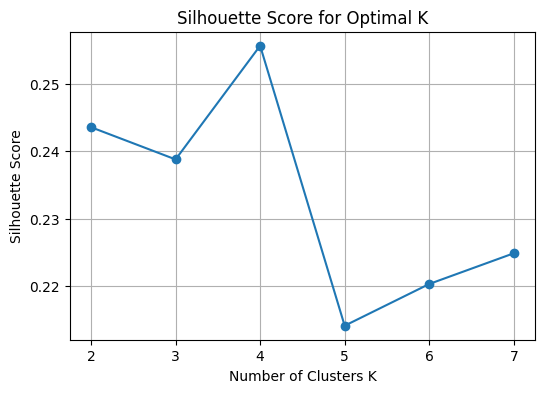

Optimal number of clusters based on Silhouette Score: 4


In [51]:
silhouette_scores = []
K_range = range(2, 8)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(6, 4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.grid(True)
plt.show()

optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_filled['Cluster'] = kmeans.fit_predict(X_scaled)

Elbow method

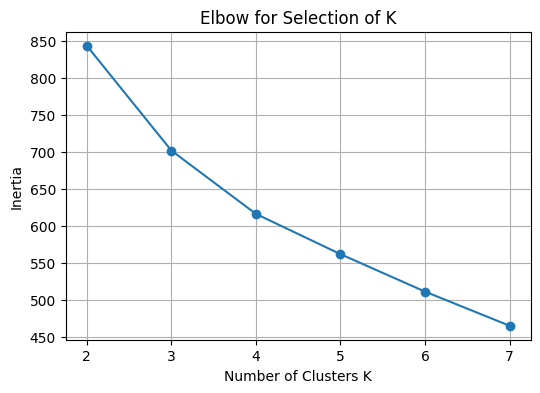

In [52]:
inertia = []
K_range = range(2, 8)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters K')
plt.ylabel('Inertia')
plt.title('Elbow for Selection of K')
plt.grid(True)
plt.show()

In [53]:
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
df_filled['Cluster_4'] = kmeans_4.fit_predict(X_scaled)
print(df_filled['Cluster_4'].value_counts())
print(df_filled.groupby('Cluster_4')[features].mean())

Cluster_4
1    55
3    42
0    25
2    23
Name: count, dtype: int64
           Average supply of protein of animal origin (g/cap/day) (3-year average)  \
Cluster_4                                                                            
0                                                  32.816000                         
1                                                  19.172727                         
2                                                  65.273913                         
3                                                  35.826190                         

           Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)  \
Cluster_4                                                                                                         
0                                                  10.421600                                                      
1                                                   3.582873          

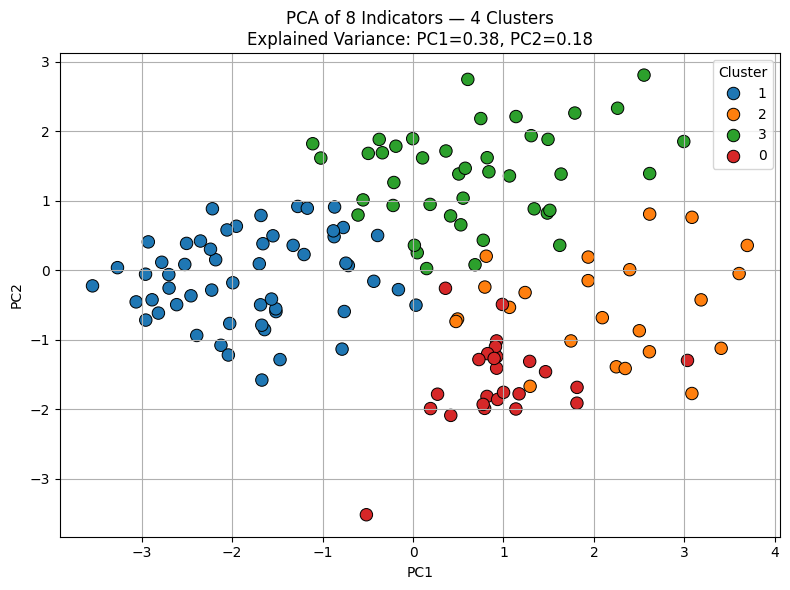

In [54]:
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
df_filled['Cluster_4'] = kmeans_4.fit_predict(X_scaled)

pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame({
    'PC1': coords[:, 0],
    'PC2': coords[:, 1],
    'Cluster': df_filled['Cluster_4'].astype(str)  
}, index=X_scaled.index)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='Cluster',
    palette='tab10',
    s=80,
    edgecolor='k'
)
var1, var2 = pca.explained_variance_ratio_[:2]
plt.title(f'PCA of 8 Indicators — 4 Clusters\nExplained Variance: PC1={var1:.2f}, PC2={var2:.2f}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [55]:
cluster_counts = df_filled['Cluster_4'].value_counts().sort_index()
cluster_desc_en = {
    0: "moderate protein & fruit/honey intake, high alcohol & tobacco use, moderate obesity",
    1: "lowest values across all risk indicators (healthiest profile)",
    2: "very high protein & sugar consumption, elevated inactivity & obesity",
    3: "extremely high obesity & inactivity, highest sugar intake; moderate protein & alcohol"
}

print("Cluster breakdown:\n")
for cluster, count in cluster_counts.items():
    desc = cluster_desc_en[cluster]
    countries = df_filled[df_filled['Cluster_4'] == cluster].index.tolist()
    print(f"Cluster {cluster} ({count} countries) — {desc}")
    print("  " + ", ".join(countries))
    print()

Cluster breakdown:

Cluster 0 (25 countries) — moderate protein & fruit/honey intake, high alcohol & tobacco use, moderate obesity
  belgium, bosnia and herzegovina, bulgaria, central african republic, croatia, czechia, estonia, france, georgia, germany, greece, hungary, ireland, latvia, lithuania, luxembourg, romania, russian federation, serbia, slovenia, spain, sweden, switzerland, ukraine, uruguay

Cluster 1 (55 countries) — lowest values across all risk indicators (healthiest profile)
  afghanistan, angola, azerbaijan, bangladesh, botswana, solomon islands, myanmar, burundi, cambodia, cameroon, cabo verde, sri lanka, chad, comoros, benin, ecuador, ethiopia, fiji, djibouti, gabon, ghana, guinea, haiti, india, indonesia, kenya, lesotho, liberia, madagascar, malawi, mali, mozambique, namibia, nepal, vanuatu, niger, nigeria, papua new guinea, guinea-bissau, timor-leste, rwanda, sao tome and principe, senegal, sierra leone, viet nam, somalia, zimbabwe, eswatini, tajikistan, togo, turkme

Cluster 0 (25 држави)
Просек: alcohol ≈ 10.4, tobacco ≈ 28.7, honey ≈ 8.4, sugar ≈ 306.3, protein ≈ 79.3, inactivity ≈ 22.9
Умерено висока консумација на протеини и плодови/мед, многу алкохол и пушење, средно ниво на дебелина → „moderate protein & fruit/honey intake, high alcohol & tobacco use, moderate obesity“

Cluster 1 (55 држави)
Просек: protein ≈ 19, alcohol ≈ 3.6, honey ≈ 0.9, sugar ≈ 138, inactivity ≈ 18.9, tobacco ≈ 16.8
Најниски вредности на сите индикатори → „healthiest profile“

Cluster 2 (23 држави)
Просек: protein ≈ 110.3, sugar ≈ 299.4, inactivity ≈ 27.0, tobacco ≈ 21.9, alcohol ≈ 7.6
Многу висока консумација на протеини и шеќер, покачена неактивност и дебелина → „very high protein & sugar consumption, elevated inactivity & obesity“

Cluster 3 (42 држави)
Просек: inactivity ≈ 41.4, sugar ≈ 366.3, obesity_per_100k ≈ 257 346, protein ≈ 35.8, alcohol ≈ 4.6, tobacco ≈ 16.5
Највисока неактивност, шеќер и дебелина; умерени макронутриенти и алкохол → „highest risk profile“